In [120]:
import csv
i = 0
with open('webAssignNov2017.txt') as f:
    reader = csv.reader(f)
    for row in reader:
        if i > 8:
            separated = row[1].split('\t')
            print row[0][:6], '\t', separated[0][:6], '\t', separated[3]
        if (i-8)%10 == 0:
            print "***************************"
        i += 1

***************************
Adams 	 Layne 	80.4%
Adding 	 Josep 	54.8%
Akiki 	 Chris 	80.4%
Alca 	 Jorge 	99.8%
Allen 	 Andre 	82.7%
Allred 	 Emma 	75.1%
Amidon 	 Sydne 	71.0%
Anders 	 Conne 	95.8%
Androm 	 Josh 	37.9%
Atkins 	 McKay 	35.2%
***************************
Baird 	 Chris 	85.1%
Barfie 	 Andre 	81.9%
Bartle 	 Jarom 	86.7%
Barton 	 Brody 	69.2%
Baugha 	 Andre 	92.2%
Bayley 	 Katel 	97.3%
Bearda 	 Chad 	96.8%
Bischo 	 Evan 	65.4%
Bleyl 	 Bo 	83.6%
Boroug 	 Brade 	57.6%
***************************
Carlso 	 Steph 	98.9%
Carter 	 Gentr 	99.3%
Carver 	 Victo 	90.6%
Christ 	 Jacob 	98.9%
Christ 	 Matth 	77.4%
Clark 	 David 	99.8%
Clark 	 Jared 	88.9%
Coffin 	 Sarah 	30.6%
Collar 	 Parke 	37.1%
Damon 	 John 	100.0%
***************************
Dinsda 	 Micha 	100.0%
Duffie 	 Nicol 	99.5%
Dunn 	 Damie 	80.1%
Edding 	 Megan 	85.6%
Flemin 	 Scott 	37.8%
Gadber 	 Jacob 	90.1%
Gill 	 Nanu 	78.1%
Gould 	 Kyle 	20.3%
Halver 	 Josh 	15.6%
Hancoc 	 Camde 	99.6%
***************************
Hans

In [95]:
from __future__ import division
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (16.0, 8.0) # Control figure size 
percentify = lambda x: (x * 100).round(1).astype(str) + "%"

Populating the interactive namespace from numpy and matplotlib


Data we want to extract from files:

- Bedtime
- Wakeup time
- Minutes asleep
- Time in bed

Calculate and plot:

- Mean time asleep by week/month
- % of time in bed spent asleep, average by week/month
- Mean bedtime by week/month
- Stdev of bedtime by week/month
- Mean wakeup time by week/month
- Stdev of wakeup time by week/month
- Day-to-day deprivation by week/month
    * Cut values off at 8hrs, convert from minutes to hrs
    * Modeling function: 1/(1+np.exp((x-4)/2))
    * Scaled: (g(x) - g(8))/(g(0)-g(8))

Logistically modeled score vs. linear score:
For  0 hrs: 100.0 % vs  100.0 %
For  1 hrs: 93.0 % vs  88.0 %
For  2 hrs: 83.0 % vs  75.0 %
For  3 hrs: 70.0 % vs  63.0 %
For  4 hrs: 54.0 % vs  50.0 %
For  5 hrs: 38.0 % vs  38.0 %
For  6 hrs: 23.0 % vs  25.0 %
For  7 hrs: 10.0 % vs  13.0 %
For  8 hrs: 0.0 % vs  0.0 %
Logistic model:


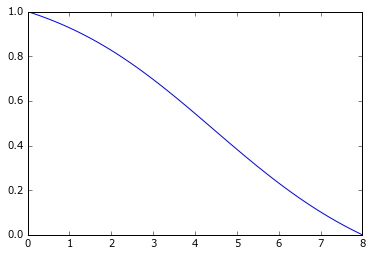

In [91]:
# Model the daily sleep below 8hrs as a comparison to all nighters

def g(x):
    val = (1+np.exp(0.5*(x-4)))**-1
    return val**0.8

def deprivation_score(x):
    return (g(x) - g(8))/(g(0) - g(8))

print "Logistically modeled score vs. linear score:"
for x in xrange(9):
    logscore = deprivation_score(x)
    linscore = 1.0 - x/8.0
    k = 100
    print "For ", x, "hrs:", k*round(logscore,2), '% vs ', k*round(linscore,2),'%'

print "Logistic model:"
domain = np.linspace(0,8,100)
plt.plot(domain,deprivation_score(domain))
plt.ylim([0,1])
plt.show()

In [94]:
data = pd.read_csv('09_2016.csv')
print data

IOError: File 09_2016.csv does not exist